## 1. Import library & Data ##

In [1]:
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
import time

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
import statsmodels.api as sm
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline

In [2]:
dr = pd.read_csv('heart.csv')
df = dr

## 2. EDA ##

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Object 형태의 Data 분포 확인 #
df1 = df.select_dtypes(include='object')
for c in df1.columns:
    print ("---- %s ---" % c)
    print (df1[c].value_counts())

---- Sex ---
M    725
F    193
Name: Sex, dtype: int64
---- ChestPainType ---
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
---- RestingECG ---
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
---- ExerciseAngina ---
N    547
Y    371
Name: ExerciseAngina, dtype: int64
---- ST_Slope ---
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [5]:
# 非Object 형태의 Data 분포 확인(1) #
df2 = df.select_dtypes(exclude='object')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


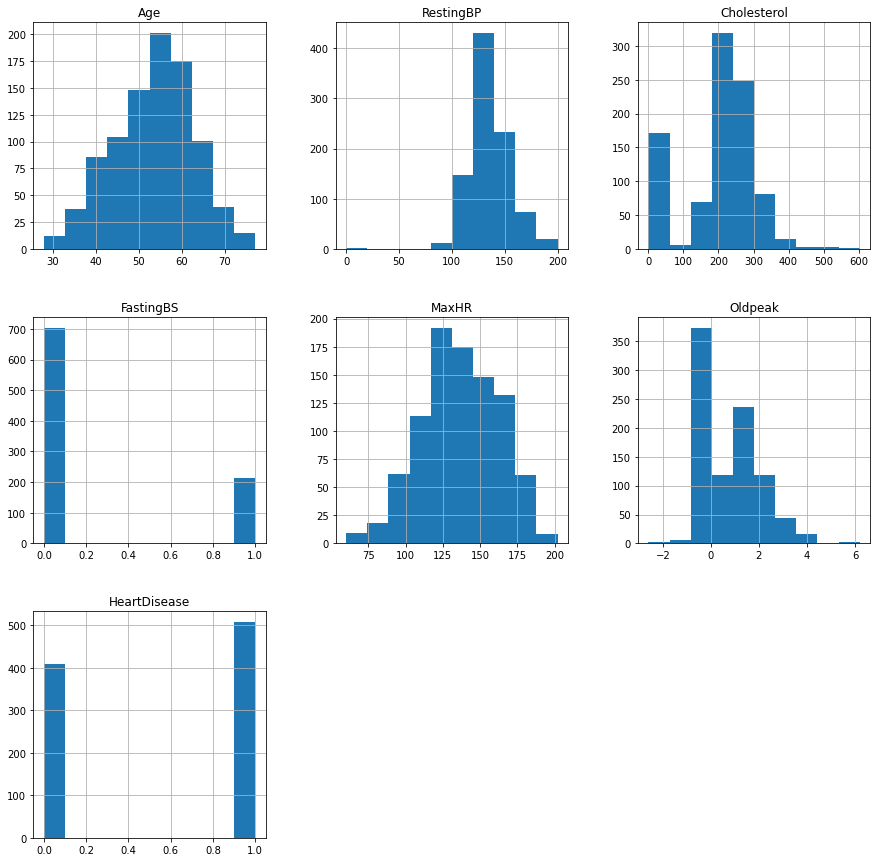

In [6]:
# 非Object 형태의 Data 분포 확인(2) #
df.hist(figsize=(15,15))
plt.show()

 - FastingBS, HeartDisease는 int형태이나 그래프로 본 결과 factor 변수인것이 확인되어 factor화 필요
 - RestingBP는 극소값 존재, Cholesterol은 왼쪽으로 치우친 경향이 보임 (test 필요)

In [7]:
#FastingBS, HeartDisease Factor 화
df["FastingBS"] = df["FastingBS"].astype(object)
df["HeartDisease"] = df["HeartDisease"].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [8]:
# 非Object Data 정상성 검토 (Shapiro test) #
df3 = df.select_dtypes(exclude='object')
for i in range(1, df3.columns.size):
    print( 'shapiro-test p값', df3.iloc[:,i].name, stats.shapiro( df3.iloc[:,i] )[1] )

shapiro-test p값 RestingBP 1.4945345782886414e-15
shapiro-test p값 Cholesterol 6.972669126282614e-27
shapiro-test p값 MaxHR 0.00016854831483215094
shapiro-test p값 Oldpeak 8.269326883616587e-28


 - 모든 수치형 데이터가 정상성을 따르지 않음

In [9]:
# 모든 수치형 Column에 대해 이상치 제거 #
# 모든 Column에서 [Q1 - 1.5IQR ~ Q3 + 1.5IQR] 포함 데이터만 남김 #

def IQR_Rule(val_list) :
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1
    
    not_outlier_cond = (Q3 + 1.5*IQR > val_list) & (Q1 - 1.5*IQR < val_list)
    return not_outlier_cond

conditions = df3.apply(IQR_Rule)
total_condition = conditions.sum(axis=1) == len(df3.columns)
len(df[total_condition])
# df = df.loc[total_condition]

690

 * 이상치 제거시 228개 데이터(25%,918개->690개) 사라짐
 * 문제에 따라 제거 여부 판단

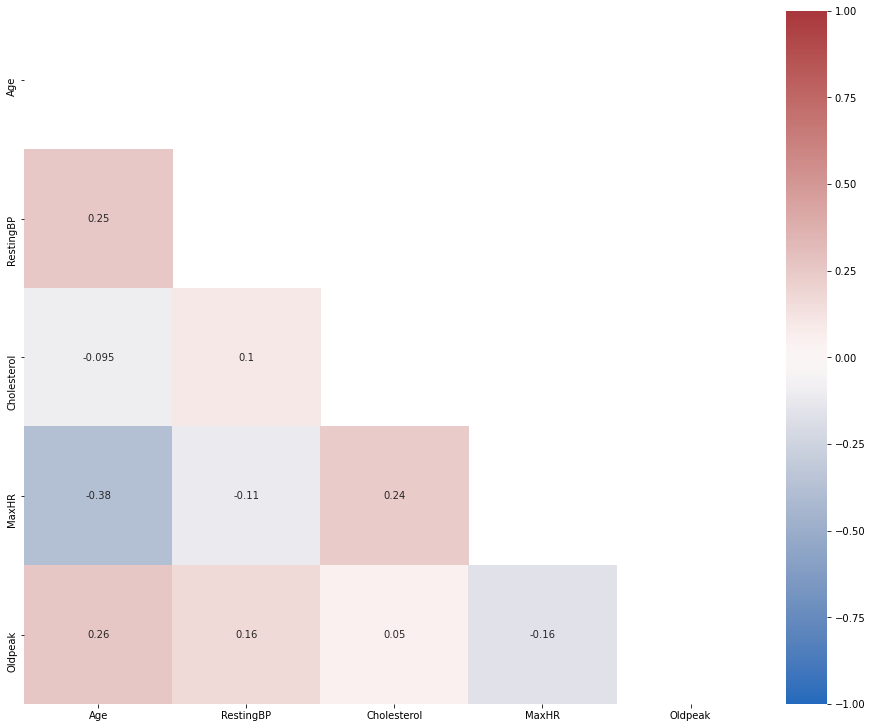

In [10]:
# 수치형 변수간 Cor 시각화 #
df3_corr = df3.corr()
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like( df3_corr, dtype=np.bool )
mask[ np.triu_indices_from( mask ) ] = True
# 히트맵 시각화
plt.figure(figsize=(12,10),
            constrained_layout = True)
sb.heatmap( df3_corr,
            annot = True,
            cmap = 'vlag',  # https://seaborn.pydata.org/tutorial/color_palettes.html
            mask = mask,
            vmin = -1, vmax = 1, center = 0)
plt.show()
print()

 - 수치형 데이터 간 강한 Cor은 미발견

## 3. Data 전처리 ##

In [11]:
# x,y 분리 #
y = df["HeartDisease"]
y = y.astype('int') # 0,1 이면 문자나 Object로 인식

x = df.drop(['HeartDisease'], axis = 1)

# Object형 X를 dummy 변수화 #
fac_col = x.select_dtypes("object").columns.tolist()
x_fac_df = pd.get_dummies(x[fac_col], drop_first = True)
x_num_df = x.select_dtypes(exclude='object')
x_final = pd.concat([x_fac_df,x_num_df],axis=1)
x_final

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,1,1,0,0,0,1,0,0,0,1,40,140,289,172,0.0
1,0,0,1,0,0,1,0,0,1,0,49,160,180,156,1.0
2,1,1,0,0,0,0,1,0,0,1,37,130,283,98,0.0
3,0,0,0,0,0,1,0,1,1,0,48,138,214,108,1.5
4,1,0,1,0,0,1,0,0,0,1,54,150,195,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,0,1,0,0,1,0,45,110,264,132,1.2
914,1,0,0,0,1,1,0,0,1,0,68,144,193,141,3.4
915,1,0,0,0,0,1,0,1,1,0,57,130,131,115,1.2
916,0,1,0,0,0,0,0,0,1,0,57,130,236,174,0.0


 - drop_first = True를 해야 변수의 수를 줄일수 있음
 - False로 두면 One-hot encoder와 같음
 - Labeling은 1,2,3 숫자가 매겨짐 (Ordinal data일때 가능)

In [12]:
# Train & Test Data 분리 #
x_train, x_test, y_train, y_test  = train_test_split( x_final, y,
                                                      stratify = y,
                                                      test_size = 0.3,
                                                      random_state = 0 )

In [13]:
# Feature Selection #

import time
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select = 6)
start_time = time.time()
rfe.fit(x_train, y_train)
rfe_time = (time.time() - start_time)

feature_list = list()
for i in range(x_train.shape[1]) :
    print('Column %d : Selected %s, Rank : %.3f' %(i, rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True :
        feature_list.append(i)

selected_x_train = x_train.iloc[:,feature_list]        

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Column 0 : Selected True, Rank : 1.000
Column 1 : Selected True, Rank : 1.000
Column 2 : Selected True, Rank : 1.000
Column 3 : Selected True, Rank : 1.000
Column 4 : Selected False, Rank : 2.000
Column 5 : Selected False, Rank : 8.000
Column 6 : Selected False, Rank : 5.000
Column 7 : Selected True, Rank : 1.000
Column 8 : Selected False, Rank : 3.000
Column 9 : Selected True, Rank : 1.000
Column 10 : Selected False, Rank : 6.000
Column 11 : Selected False, Rank : 9.000
Column 12 : Selected False, Rank : 10.000
Column 13 : Selected False, Rank : 7.000
Column 14 : Selected False, Rank : 4.000


In [14]:
# Build ML models # 

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import time

svc_errors = []
ada_errors = []
bag_errors = []
rfc_errors = []
vc_errors = []
xgb_errors = []
skf = StratifiedKFold(n_splits=10)

In [15]:
# Stratified-split & Time & error rate #

for train_idx, valid_idx in skf.split(x_train, y_train):
    tra, val = x_train.iloc[train_idx], x_train.iloc[valid_idx]
    target_tra, target_val = list(y_train.iloc[train_idx]), list(y_train.iloc[valid_idx])

    #SVC
    svc = SVC(probability=True)
    start_time = time.time()
    svc.fit(tra, target_tra)
    svc_time = (time.time() - start_time)
    pred = svc.predict(val)
    error = mean_squared_error(target_val, pred)
    svc_errors.append(error)
    
    #AdaBoostClassifier
    ada = AdaBoostClassifier()
    start_time = time.time()
    ada.fit(tra, target_tra)
    ada_time = (time.time() - start_time)
    pred = ada.predict(val)
    error = mean_squared_error(target_val, pred)
    ada_errors.append(error)
    
    #BaggingClassifier
    bag = BaggingClassifier()
    start_time = time.time()
    bag.fit(tra, target_tra)
    bag_time = (time.time() - start_time)
    pred = bag.predict(val)
    error = mean_squared_error(target_val, pred)
    bag_errors.append(error)
    
    #RandomForestClassifier
    rfc = RandomForestClassifier()
    start_time = time.time()
    rfc.fit(tra, target_tra)
    rfc_time = (time.time() - start_time)
    pred = rfc.predict(val)
    error = mean_squared_error(target_val, pred)
    rfc_errors.append(error)
    
    #XGBoostClassifier
    xgb = XGBClassifier()
    start_time = time.time()
    xgb.fit(tra, target_tra)
    xgb_time = (time.time() - start_time)
    pred = xgb.predict(val)
    error = mean_squared_error(target_val, pred)
    xgb_errors.append(error)
    
    #VotingClassifier
    vc = VotingClassifier(estimators=[('svc',svc), ('ada',ada), ('bag',bag), ('rfc',rfc), ('xgb',xgb)], voting = 'soft')
    start_time = time.time()
    vc.fit(tra, target_tra)
    vc_time = (time.time() - start_time)
    pred = vc.predict(val)
    error = mean_squared_error(target_val, pred)
    vc_errors.append(error)

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
ada_final_error = sum(ada_errors) / len(ada_errors)
print('AdaBoost FINAL MSE: %.3f' % (ada_final_error))
print('Ada time : %.3f \n' %(ada_time))

svc_final_error = sum(svc_errors) / len(svc_errors)
print('SVC FINAL MSE: %.3f' % (svc_final_error))
print('svc time : %.3f \n' %(svc_time))

rfc_final_error = sum(rfc_errors) / len(rfc_errors)
print('RANDOM FOREST FINAL MSE: %.3f' % (rfc_final_error))
print('rfc time : %.3f \n' %(rfc_time))

bag_final_error = sum(bag_errors) / len(bag_errors)
print('Bagging FINAL MSE: %.3f' % (bag_final_error))
print('bag time : %.3f \n' %(bag_time))

xgb_final_error = sum(xgb_errors) / len(xgb_errors)
print('XGBoost FINAL MSE: %.3f' % (xgb_final_error))
print('xgb time : %.3f \n' %(xgb_time))

vc_final_error = sum(vc_errors) / len(vc_errors)
print('Voting FINAL MSE: %.3f' % (vc_final_error))
print('vc time : %.3f \n' %(vc_time))

AdaBoost FINAL MSE: 0.150
Ada time : 0.122 

SVC FINAL MSE: 0.279
svc time : 0.166 

RANDOM FOREST FINAL MSE: 0.140
rfc time : 0.228 

Bagging FINAL MSE: 0.168
bag time : 0.038 

XGBoost FINAL MSE: 0.148
xgb time : 0.233 

Voting FINAL MSE: 0.137
vc time : 0.739 



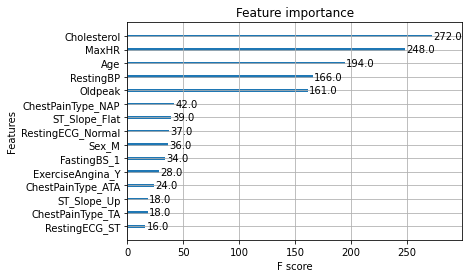

In [17]:
# Feature Importance #
plot_importance(xgb)
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV, KFold

In [19]:
# Grid search #
rf_param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

In [20]:
rf = RandomForestClassifier()
kf = KFold(random_state = 0,
          n_splits = 10,
          shuffle = True)

In [21]:
rf_grid_search = GridSearchCV(estimator = rf,
                          param_grid = rf_param_grid,
                          cv = kf,
                          n_jobs = -1,
                          verbose = 2)

In [22]:
rf_grid_search.fit(x_train, y_train)
rf_grid_search.best_params_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 0.01,
 'n_estimators': 200}

In [23]:
# Forecast with best params #
rf_clf1 = RandomForestClassifier(max_depth = 9,
                                max_features = 'auto',
                                min_samples_split = 0.01,
                                n_estimators = 100,
                                n_jobs = -1)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.8804
